## From simulation-based exploration to norm induction and policy deduction



In [2]:
import sys
import os
import random
import networkx as nx
sys.path.insert(1, '/home/peter/Desktop/postdoc/Prolog-Gym')
#from env_input.ConstraintsHandler import PrologHandler
import matplotlib.pyplot as plt
from environments.dataSharing.dataSharing import DataSharing
from norm_analysis.norm_explorer import NormExplorer
from norm_analysis.instance import Instance

In [2]:
env_config = {'pathToRules': '/home/peter/Desktop/postdoc/Prolog-Gym/benchmarks/dataSharing/rules.pl',
              'pathToInitialState': '/home/peter/Desktop/postdoc/Prolog-Gym/benchmarks/dataSharing/initialState.pl',
             }
env = DataSharing(env_config)


def runRollout(agent, actions = None, max_iter = 5000, max_steps = 8, unique = None):
    normExplorer = NormExplorer()
    for i in range(max_iter):
        traj = Instance()
        observation, info = env.reset()
        
        for i in range(l):
            if actions is not None:
                action = actions[i]
            else:
                action = env.randomAllowedAction(agent=agent)
            if action['action'] != "NullAction":
                new_observation, reward, terminated, truncated, info = env.step(action)
                traj.append(observation, action, new_observation, reward, info)
                traj.terminated = terminated
                traj.truncated = truncated
                observation = new_observation#.copy()
            else:
                break
            if terminated == True:
                break
        normExplorer.addInstance(traj, unique=unique)
    return normExplorer

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

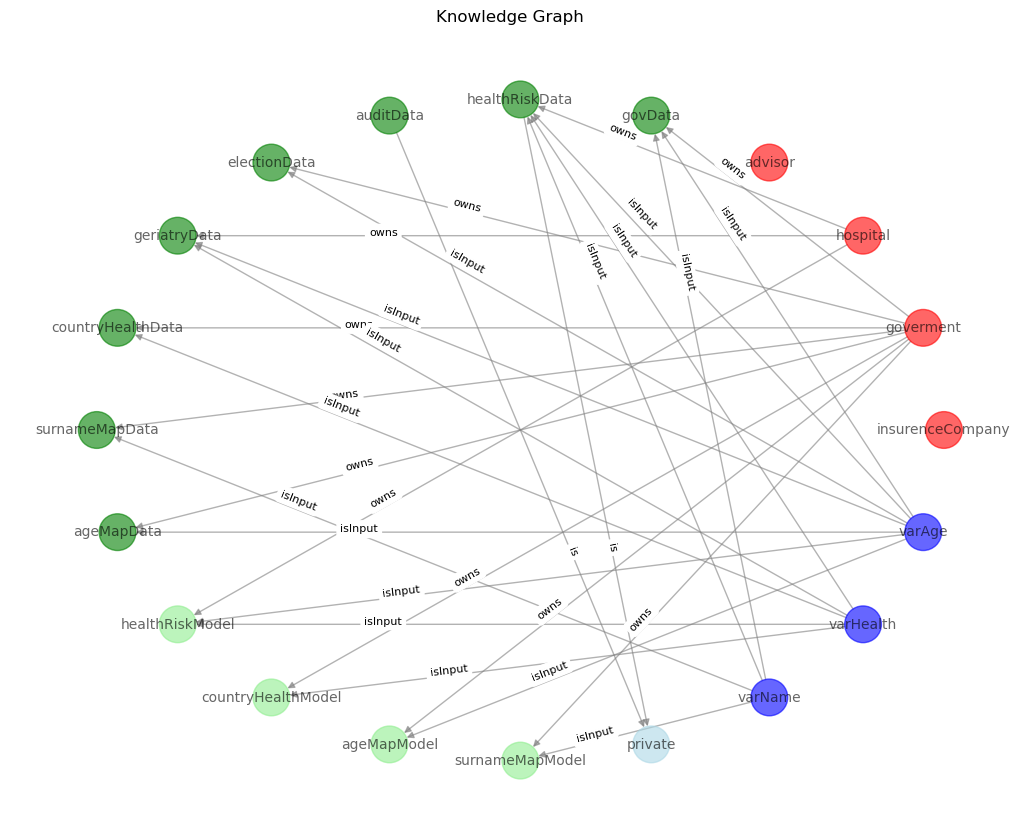

In [3]:
#plot initial state, consider:https://github.com/paulbrodersen/netgraph
G = nx.DiGraph()
init_obs, init_info = env.reset()

for state_fact in init_info['state']:
    if state_fact['fact'] == 'agent':
        G.add_node(state_fact['X0'], color = 'red')
    elif state_fact['fact'] == 'data':
        G.add_node(state_fact['X0'], color = 'green')
    elif state_fact['fact'] == 'model':
        G.add_node(state_fact['X0'], color = 'lightgreen')


df = env.getStateAsTriplets(init_info['state'])
for _, row in df.iterrows():
    G.add_edge(row['head'], row['tail'], relation=row['relation'])

G.add_node('private', color = 'lightblue') #you can also find the time to split colors inside the node, maybe it will look more cool
for state_fact in init_info['state']:
    if state_fact['fact'] == 'private':
        G.add_edge(state_fact['X0'], 'private', relation='is')

for var in ['varName', 'varHealth', 'varAge']:
    G.add_node(var, color = 'blue')
    for state_fact in init_info['state']:
        if state_fact['fact'] in var:
            G.add_edge(var, state_fact['X0'], relation='isInput')


colors = nx.get_node_attributes(G, 'color').values()

pos = nx.circular_layout(G)
labels = nx.get_edge_attributes(G, 'relation')
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color=colors, edge_color='gray', alpha=0.6)#, connectionstyle='arc3, rad = 0.1')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8, label_pos=0.3, verticalalignment='baseline')
plt.title('Knowledge Graph')
plt.show()

In [4]:
#create data

## Random Agent

90


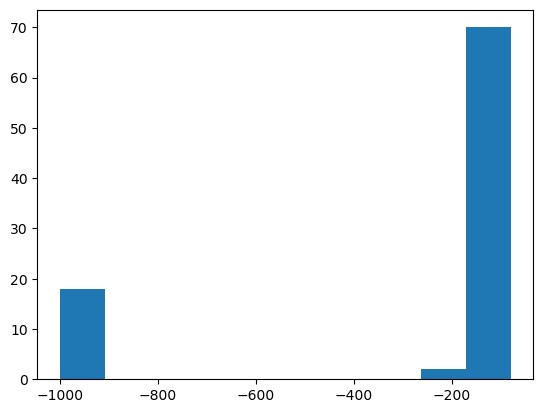

In [5]:
max_steps = 10
max_iter = 2000

normExplorer = runRollout(max_iter=max_iter, max_steps=max_steps, unique='endStateEqualTo')
#normExplorer = runRollout(max_iter=max_iter, max_steps=max_steps)
cumRewards = normExplorer.getTotalRewards()
plt.hist(cumRewards, bins=10)
print(len(normExplorer.instances))

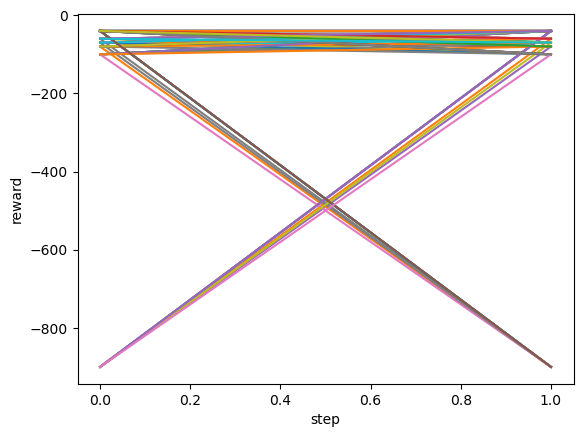

In [6]:
normExplorer.plotRewards()

In [7]:
terminated_count = 0
for id, traj in normExplorer.instances.items():
    print(id, traj.terminated)
    if traj.terminated == True:
        terminated_count = terminated_count + 1
        #print(traj.observation)

terminated_count/len(normExplorer.instances)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 True
67 False
68 False
69 False
70 False
71 False
72 False
73 False
74 False
75 False
76 False
77 False
78 False
79 False
80 False
81 False
82 False
83 False
84 False
85 False
86 True
87 False
88 False
89 False


0.022222222222222223

In [8]:
res = env.handler.makeQuery('data(X)')
datas = [d['X'] for d in res]
res = env.handler.makeQuery('model(X)')
models = [d['X'] for d in res]
dm = datas + models

norm_arguments = []
for id, traj in normExplorer.instances.items():
    #print(traj.observation[-1])
    relevantData = []
    for data in dm:
        if {'X0': 'insurenceCompany', 'X1': data, 'fact': 'hasAccess'} in traj.info[-1]['state']:
            relevantData.append(data)
        if {'X0': 'insurenceCompany', 'X1': data, 'fact': 'owns'} in traj.info[-1]['state']:
            relevantData.append(data)
    #relevantData.sort()
    print(id, relevantData)
    norm_arguments.append(relevantData)


0 ['surnameMapData', 'surnameMapModel']
1 ['countryHealthData', 'healthRiskModel']
2 ['govData', 'countryHealthData']
3 ['healthRiskModel', 'countryHealthModel']
4 ['electionData', 'healthRiskModel']
5 ['countryHealthData', 'surnameMapData']
6 ['countryHealthModel', 'surnameMapModel']
7 ['countryHealthData', 'healthRiskModel']
8 ['ageMapData', 'healthRiskModel']
9 ['countryHealthModel', 'ageMapModel']
10 ['countryHealthModel', 'ageMapModel']
11 ['govData', 'ageMapData']
12 ['countryHealthData', 'ageMapModel']
13 ['ageMapData', 'ageMapModel']
14 ['healthRiskModel', 'surnameMapModel']
15 ['electionData', 'geriatryData']
16 ['countryHealthData', 'surnameMapModel']
17 ['surnameMapData', 'healthRiskModel']
18 ['govData', 'countryHealthData']
19 ['healthRiskModel', 'ageMapModel']
20 ['electionData', 'surnameMapData']
21 ['electionData', 'healthRiskModel']
22 ['countryHealthData', 'surnameMapModel']
23 ['geriatryData', 'surnameMapModel']
24 ['ageMapData', 'surnameMapModel']
25 ['electionData'

In [9]:

#this needs to be changed


lines = []
for id,traj in normExplorer.instances.items():
    tw_write = ''
    sid = str(id)
    #clause = 'norm(insurenceCompany'+sid+',healthRiskData'+sid+',hospitalData'+sid+',govData'+sid+')'
    #clause = 'norm(insurenceCompany'+sid+',healthRiskData'+sid+')'
    arg0 = norm_arguments[id][0]
    arg1 = norm_arguments[id][1]
    #clause = 'norm(insurenceCompany'+sid+','+arg0+sid+','+arg1+sid+')'
    clause = 'norm('+arg0+sid+','+arg1+sid+')'
    if traj.terminated == True:
        #to_write = 'pos(norm(insurenceCompany'+sid+',healthRiskData'+sid+',hospitalData'+sid+',govData'+sid+',groceriesData'+sid+')).'
        to_write = 'pos(' + clause + ').'
    elif traj.terminated == False:
        to_write = 'neg(' + clause + ').'
    else:
        print("Unlabeled instance! ", id)
    lines.append(to_write)

with open('popper/exs.pl', 'w') as f:
    for line in sorted(lines, reverse=True):
        f.write(f"{line}\n")

In [10]:
def getEntities(env, entity_types = ['agent', 'data', 'model']):
    entities = set()
    for entity in entity_types:
        for sol in env.handler.makeQuery(entity + '(X)'):
            entities.add(sol['X'])
    return entities

entities = getEntities(env)

lines = []
for id,traj in normExplorer.instances.items():

    to_write = traj.info[-1]['prologState'].copy()
    for i in range(len(to_write)):
        for entity in entities:
            to_write[i] = to_write[i].replace(entity, entity + str(id) )

        to_write[i] = to_write[i] + '.'
    lines = lines + to_write


with open('popper/bk.pl', 'w') as f:
    for line in sorted(lines):
        f.write(f"{line}\n")

In [11]:
sys.path.insert(1, '/home/peter/Desktop/postdoc/normBuilding/Popper')

#need to be run with cybersim kernel
from popper.util import Settings, print_prog_score
from popper.loop import learn_solution

In [12]:
noiz = False
settings = Settings(kbpath='/home/peter/Desktop/postdoc/Prolog-Gym/benchmarks/dataSharing/popper',show_stats=False, noisy=noiz)

#/home/peter/Desktop/postdoc/normBuilding/Popper/examples/noisy-wn18rr1

settings.timeout = 2*1800
#settings.max_body = 20
#settings.max_vars = 15
#settings.max_rules = 15

prog, score, stats = learn_solution(settings)
if prog != None:
    print_prog_score(prog, score, noisy=noiz)
    #settings.print_prog_score(prog, score)
else:
    print('NO SOLUTION')
if settings.show_stats:
    stats.show()

21:35:30 Generating programs of size: 2
21:35:30 Generating programs of size: 3
21:35:34 Generating programs of size: 4
21:35:49 Generating programs of size: 5
21:42:18 Generating programs of size: 6


********** SOLUTION **********
Precision:1.00 Recall:1.00 TP:2 FN:0 TN:88 FP:0 Size:6
norm(A,B):- varHealth(B),varAge(B),model(B),varName(A),varAge(A).
******************************
